<a href="https://colab.research.google.com/github/JustmeLu/Aprendizaje-Automatico/blob/main/2-Notebooks/08-Agrupamiento-Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Notebooks/08-Agrupamiento-Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento Jerarquico
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; Periodo 2025-02
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado como una guía introductoria para implementar modelos de agrupamiento jerárquico en Python.

Los paquetes necesarios son:

In [11]:
# Paquetes necesarios
import pandas as pd # Para manejo de datos
import matplotlib.pyplot as plt # Para visualización
import numpy as np # Para manejo de arreglos
import plotly.express as px # Para visualización
from scipy.spatial.distance import cdist # Para cálculo de distancias
# Modelo de clustering jerárquico
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Estandarización de datos
from sklearn.preprocessing import StandardScaler
# Para PCA
from sklearn.decomposition import PCA

---
## <font color='264CC7'> Ejemplo </font>

En el siguiente código, se genera un dendrograma a partir de un conjunto de datos de ejemplo. Se utiliza el método de enlace completo.

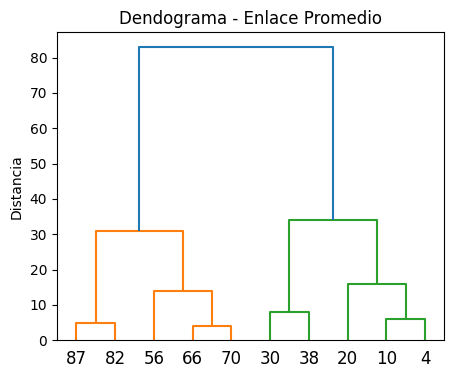

In [12]:
# Datos de entrada
data = np.array([10, 4, 20, 30, 38, 87, 82, 56, 66, 70]).reshape(-1, 1)

# Aplicar el agrupamiento jerárquico con criterio de enlace promedio
linkage_matrix = linkage(data, method='complete')

# Visualizar el dendograma
plt.figure(figsize=(5, 4))
dendrogram(linkage_matrix, labels=data.flatten())
plt.title('Dendograma - Enlace Promedio')
plt.ylabel('Distancia')
plt.show()

Podemos visualizar la diferencia con varios métodos de enlace.

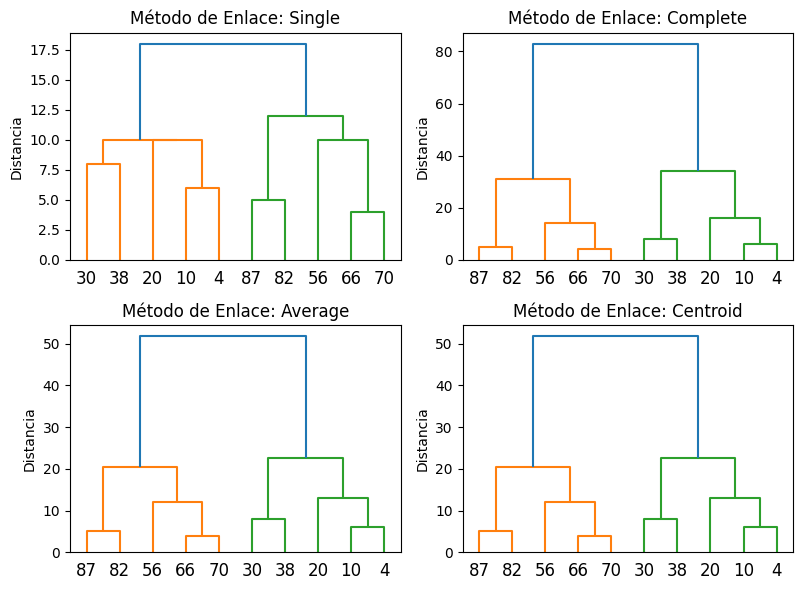

In [13]:
# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.ravel()  # Convertir la matriz de ejes en una lista para iterar fácilmente

# Métodos de enlace
methods = ['single', 'complete', 'average', 'centroid']

# Generar dendogramas en subplots
for i, method in enumerate(methods):
    linkage_matrix = linkage(data, method=method)
    dendrogram(linkage_matrix, labels=data.flatten(), ax=axes[i])
    axes[i].set_title(f'Método de Enlace: {method.capitalize()}')
    axes[i].set_ylabel('Distancia')

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()

---
## <font color='264CC7'> Ejemplo en dos dimensiones </font>


Utilicemos datos ficticios:

In [14]:
# Datos
data = {
    "Name": ["Alan", "Lisa", "Joe", "Max", "Cora", "Adam", "Kim", "Ali", "Chen", "Jack", "Levi"],
    "Social Media": [7, 5, 5, 7, 4, 8, 2, 8, 4, 14, 8],
    "Gym": [3, 2, 3, 4, 5, 9, 12, 2, 14, 1, 10]
}

# Crear un DataFrame
df = pd.DataFrame(data)
display(df)

# Extraer las columnas numéricas para el clustering
X = df[["Social Media", "Gym"]]

,Name,Social Media,Gym
0,Alan,7,3
1,Lisa,5,2
2,Joe,5,3
3,Max,7,4
4,Cora,4,5
5,Adam,8,9
6,Kim,2,12
7,Ali,8,2
8,Chen,4,14
9,Jack,14,1


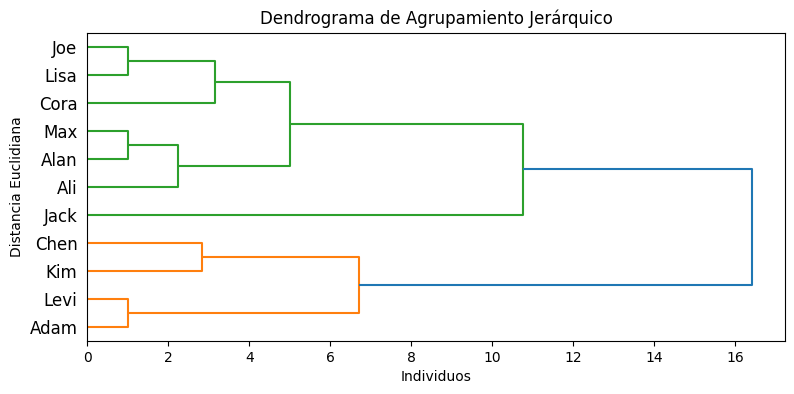

In [15]:
# Extraer las columnas numéricas para el clustering
X = df[["Social Media", "Gym"]]

# Calcular el dendrograma
plt.figure(figsize=(9, 4))
dendrogram(
    linkage(X, method='complete'),
    orientation='right',
    labels=df["Name"].values )
plt.title("Dendrograma de Agrupamiento Jerárquico")
plt.xlabel("Individuos")
plt.ylabel("Distancia Euclidiana")
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Genera el agrupamiento con tres métricas diferentes y con tres métodos de enlaces diferentes (en total, 9 gráficos). ¿Qué diferencias observas?
</div>

---
## <font color='264CC7'> Ejemplo práctico </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero leamos los datos y seleccionemos las columnas que utilizaremos:

In [16]:
# Leer los datos
data = pd.read_csv('https://raw.githubusercontent.com/andres-merino/AprendizajeAutomaticoInicial-05-N0105/refs/heads/main/2-Notebooks/datos/Pokemon.csv')
# Tomo las columnas de interés
numeric_cols = ['Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def', 'HP']
data = data[['Name', *numeric_cols]]
# Muestro los primeros registros
display(data.head())

,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP
0,Bulbasaur,49,49,45,65,65,45
1,Ivysaur,62,63,60,80,80,60
2,Venusaur,82,83,80,100,100,80
3,Charmander,52,43,65,60,50,39
4,Charmeleon,64,58,80,80,65,58


Revisemos los datos:

In [17]:
data.describe()

,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,72.549669,68.225166,68.933775,67.139073,66.019868,64.211921
std,26.596162,26.916704,26.746880,28.534199,24.197926,28.590117
min,5.000000,5.000000,15.000000,15.000000,20.000000,10.000000
25%,51.000000,50.000000,46.500000,45.000000,49.000000,45.000000
50%,70.000000,65.000000,70.000000,65.000000,65.000000,60.000000
75%,90.000000,84.000000,90.000000,87.500000,80.000000,80.000000
max,134.000000,180.000000,140.000000,154.000000,125.000000,250.000000


Escalemos los datos:

In [18]:
# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, 1:])

### <font color='264CC7'> Dendograma </font>

Generamos el dendograma con la distancia de corte:

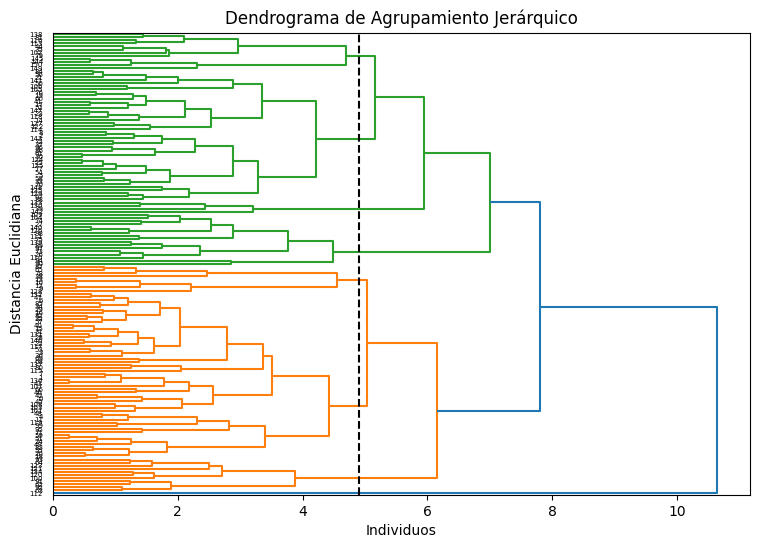

In [19]:
# Realizamos el clustering jerárquico
Z = linkage(X, method='complete')

# Definir la distancia de corte
distancia_corte = 4.9

# Calcular el dendrograma
plt.figure(figsize=(9, 6))
dendrogram(Z,
    orientation='right', )
plt.axvline(x=distancia_corte, c='k', ls='--')
plt.title("Dendrograma de Agrupamiento Jerárquico")
plt.xlabel("Individuos")
plt.ylabel("Distancia Euclidiana")
plt.show()

### <font color='264CC7'> Asignación de grupos </font>

In [20]:
# Ahora asignamos las etiquetas de clúster
clusters = fcluster(Z, t=distancia_corte, criterion='distance')

# Agregar la información de clúster como C1, C2, C3, etc.
data['Cluster'] = ['C' + str(c) for c in clusters]

# Revisar los primeros registros
display(data.head())

,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
0,Bulbasaur,49,49,45,65,65,45,C2
1,Ivysaur,62,63,60,80,80,60,C2
2,Venusaur,82,83,80,100,100,80,C6
3,Charmander,52,43,65,60,50,39,C2
4,Charmeleon,64,58,80,80,65,58,C2


### <font color='264CC7'> Análisis de clústers </font>

Revisemos la cantidad de cada cluster:

In [21]:
# Cantidades de elementos por clúster
data['Cluster'].value_counts()

,count
Cluster,
C2,54
C6,43
C4,17
C7,12
C1,11
C3,9
C5,4
C8,1


Podemos analizar las características de cada cluster:

In [22]:
# Podemos ver las medias de cada clúster
data.groupby('Cluster')[numeric_cols].mean()


,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP
Cluster,,,,,,
C1,49.090909,49.090909,106.363636,110.000000,78.181818,49.545455
C2,57.074074,54.481481,56.944444,56.111111,55.814815,49.148148
C3,43.333333,45.555556,37.222222,29.444444,28.888889,61.666667
C4,95.000000,113.235294,52.941176,47.941176,48.529412,56.764706
C5,82.500000,62.500000,50.000000,86.250000,87.500000,140.000000
C6,93.790698,71.674419,88.232558,71.488372,84.651163,73.976744
C7,80.000000,95.666667,73.750000,113.666667,76.250000,82.166667
C8,5.000000,5.000000,50.000000,35.000000,105.000000,250.000000


Revisemos los cinco primeros elementos de cada cluster:

In [23]:
# Mostremos los nombres de 5 pokemones de cada clúster
for cluster in data['Cluster'].unique():
    print(f'Cluster {cluster}: cantidad de elementos {data[data["Cluster"] == cluster].shape[0]}')
    display(data[data['Cluster'] == cluster].head(5))

Cluster C2: cantidad de elementos 54


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
0,Bulbasaur,49,49,45,65,65,45,C2
1,Ivysaur,62,63,60,80,80,60,C2
3,Charmander,52,43,65,60,50,39,C2
4,Charmeleon,64,58,80,80,65,58,C2
6,Squirtle,48,65,43,50,64,44,C2


Cluster C6: cantidad de elementos 43


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
2,Venusaur,82,83,80,100,100,80,C6
5,Charizard,84,78,100,109,85,78,C6
8,Blastoise,83,100,78,85,105,79,C6
14,Beedrill,90,40,75,45,80,65,C6
17,Pidgeot,80,75,101,70,70,83,C6


Cluster C3: cantidad de elementos 9


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
9,Caterpie,30,35,45,20,20,45,C3
10,Metapod,20,55,30,25,25,50,C3
12,Weedle,35,30,50,20,20,40,C3
13,Kakuna,25,50,35,25,25,45,C3
38,Jigglypuff,45,20,20,45,25,115,C3


Cluster C4: cantidad de elementos 17


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
26,Sandshrew,75,85,40,20,30,50,C4
27,Sandslash,100,110,65,45,55,75,C4
73,Geodude,80,100,20,30,30,40,C4
74,Graveler,95,115,35,45,45,55,C4
75,Golem,120,130,45,55,65,80,C4


Cluster C7: cantidad de elementos 12


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
35,Clefable,70,73,60,95,90,95,C7
44,Vileplume,80,85,50,110,90,75,C7
79,Slowbro,75,110,30,100,80,95,C7
81,Magneton,60,95,70,120,70,50,C7
102,Exeggutor,95,85,55,125,65,95,C7


Cluster C5: cantidad de elementos 4


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
39,Wigglytuff,70,45,45,85,50,140,C5
130,Lapras,85,80,60,85,95,130,C5
133,Vaporeon,65,60,65,110,95,130,C5
142,Snorlax,110,65,30,65,110,160,C5


Cluster C1: cantidad de elementos 11


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
62,Abra,20,15,90,105,55,25,C1
63,Kadabra,35,30,105,120,70,40,C1
64,Alakazam,50,45,120,135,95,55,C1
91,Gastly,35,30,80,100,35,30,C1
92,Haunter,50,45,95,115,55,45,C1


Cluster C8: cantidad de elementos 1


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
112,Chansey,5,5,50,35,105,250,C8


### <font color='264CC7'> Visualizaciones  </font>

In [24]:
# Realizo un PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear un DataFrame para graficar fácilmente
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Name'] = data['Name'].values
df_pca['Cluster'] = data['Cluster'].values

# Crear el scatterplot interactivo con Plotly Express
fig = px.scatter(
    df_pca,
    x='PC1',
    y='PC2',
    color='Cluster',
    hover_data=['Name'],  # Mostrará 'Name'
)

# Personalizar apariencia
fig.update_traces(marker=dict(opacity=0.8))
fig.update_layout(
    title='Clústeres visualizados en 2D (PCA)',
    width=800,
    height=600,
)

fig.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Genera el agrupamiento con diferentes métricas y métodos de enlaces. ¿Qué diferencias observas?
</div>

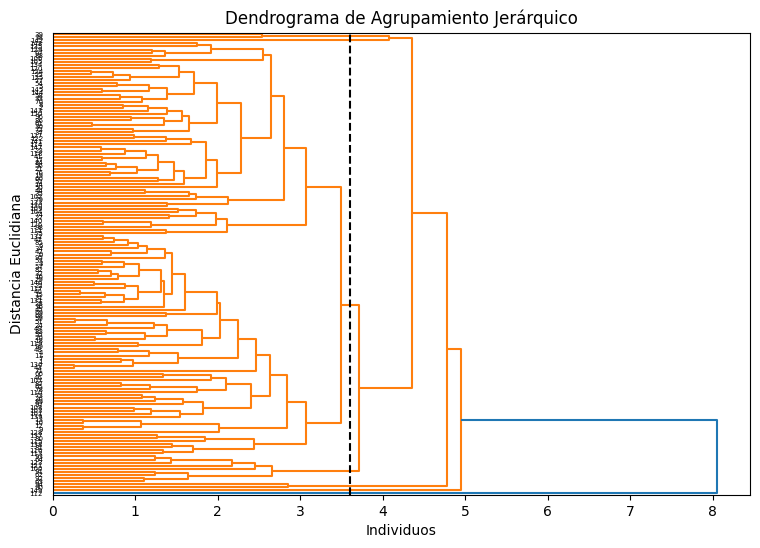

In [27]:
# Realizamos el clustering jerárquico
Z = linkage(X, method='average')

# Definir la distancia de corte
distancia_corte = 3.6

# Calcular el dendrograma
plt.figure(figsize=(9, 6))
dendrogram(Z,
    orientation='right', )
plt.axvline(x=distancia_corte, c='k', ls='--')
plt.title("Dendrograma de Agrupamiento Jerárquico")
plt.xlabel("Individuos")
plt.ylabel("Distancia Euclidiana")
plt.show()

In [28]:
# Ahora asignamos las etiquetas de clúster
clusters = fcluster(Z, t=distancia_corte, criterion='distance')

# Agregar la información de clúster como C1, C2, C3, etc.
data['Cluster'] = ['C' + str(c) for c in clusters]

# Revisar los primeros registros
display(data.head())

,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
0,Bulbasaur,49,49,45,65,65,45,C3
1,Ivysaur,62,63,60,80,80,60,C3
2,Venusaur,82,83,80,100,100,80,C3
3,Charmander,52,43,65,60,50,39,C3
4,Charmeleon,64,58,80,80,65,58,C3


In [29]:
# Cantidades de elementos por clúster
data['Cluster'].value_counts()

,count
Cluster,
C3,135
C2,9
C4,2
C1,2
C7,1
C5,1
C6,1


In [30]:
# Podemos ver las medias de cada clúster
data.groupby('Cluster')[numeric_cols].mean()


,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP
Cluster,,,,,,
C1,70.000000,170.000000,70.000000,57.500000,45.000000,42.500000
C2,44.444444,43.888889,102.777778,111.111111,75.555556,46.666667
C3,74.629630,69.200000,67.177778,63.992593,65.325926,62.370370
C4,57.500000,32.500000,32.500000,65.000000,37.500000,127.500000
C5,110.000000,65.000000,30.000000,65.000000,110.000000,160.000000
C6,110.000000,90.000000,130.000000,154.000000,90.000000,106.000000
C7,5.000000,5.000000,50.000000,35.000000,105.000000,250.000000


In [31]:
# Mostremos los nombres de 5 pokemones de cada clúster
for cluster in data['Cluster'].unique():
    print(f'Cluster {cluster}: cantidad de elementos {data[data["Cluster"] == cluster].shape[0]}')
    display(data[data['Cluster'] == cluster].head(5))

Cluster C3: cantidad de elementos 135


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
0,Bulbasaur,49,49,45,65,65,45,C3
1,Ivysaur,62,63,60,80,80,60,C3
2,Venusaur,82,83,80,100,100,80,C3
3,Charmander,52,43,65,60,50,39,C3
4,Charmeleon,64,58,80,80,65,58,C3


Cluster C4: cantidad de elementos 2


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
38,Jigglypuff,45,20,20,45,25,115,C4
39,Wigglytuff,70,45,45,85,50,140,C4


Cluster C2: cantidad de elementos 9


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
62,Abra,20,15,90,105,55,25,C2
63,Kadabra,35,30,105,120,70,40,C2
64,Alakazam,50,45,120,135,95,55,C2
91,Gastly,35,30,80,100,35,30,C2
92,Haunter,50,45,95,115,55,45,C2


Cluster C1: cantidad de elementos 2


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
90,Cloyster,95,180,70,85,45,50,C1
94,Onix,45,160,70,30,45,35,C1


Cluster C7: cantidad de elementos 1


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
112,Chansey,5,5,50,35,105,250,C7


Cluster C5: cantidad de elementos 1


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
142,Snorlax,110,65,30,65,110,160,C5


Cluster C6: cantidad de elementos 1


,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Cluster
149,Mewtwo,110,90,130,154,90,106,C6


In [32]:
# Realizo un PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear un DataFrame para graficar fácilmente
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Name'] = data['Name'].values
df_pca['Cluster'] = data['Cluster'].values

# Crear el scatterplot interactivo con Plotly Express
fig = px.scatter(
    df_pca,
    x='PC1',
    y='PC2',
    color='Cluster',
    hover_data=['Name'],  # Mostrará 'Name'
)

# Personalizar apariencia
fig.update_traces(marker=dict(opacity=0.8))
fig.update_layout(
    title='Clústeres visualizados en 2D (PCA)',
    width=800,
    height=600,
)

fig.show()